In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import StandardScaler # Scaling is suggested when running a gradient descent algorithm

import matplotlib # a plotting library
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline


In [187]:
df = pd.read_csv ('games_data.csv')
data = df.to_numpy()
X = data[:100 , [1,2,3,4,5,8,9,10,11,12,13]]
y = data[:100 , 6]
print(X.shape)
print(y.shape)

(100, 11)
(100,)


In [188]:
for i in range(X.shape[0]):
    X[i][0] = len(X[i][0])
print(X)

[[18 638.0 2.02 ... 0.0 4.42 11.0]
 [13 1992.0 1.53 ... 0.0 4.04 6.0]
 [19 1364.0 1.01 ... 0.0 0.089 6.0]
 ...
 [28 1395.0 1.09 ... 1.0 1.83 8.0]
 [21 4835.0 2.0 ... 1.0 49.46 4.0]
 [17 594.0 1.89 ... 1.0 8.58 2.0]]


In [189]:
#Linear Regression with normalization 
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled)


[[2.50000000e-01 7.25789135e-02 5.10101010e-01 ... 0.00000000e+00
  4.28236119e-02 4.76190476e-01]
 [1.60714286e-01 3.63324028e-01 2.62626263e-01 ... 0.00000000e+00
  3.91226857e-02 2.38095238e-01]
 [2.67857143e-01 2.28473266e-01 0.00000000e+00 ... 0.00000000e+00
  6.42792446e-04 2.38095238e-01]
 ...
 [4.28571429e-01 2.35129912e-01 4.04040404e-02 ... 1.00000000e+00
  1.75988780e-02 3.33333333e-01]
 [3.03571429e-01 9.73802877e-01 5.00000000e-01 ... 1.00000000e+00
  4.81480760e-01 1.42857143e-01]
 [2.32142857e-01 6.31307709e-02 4.44444444e-01 ... 1.00000000e+00
  8.33390146e-02 4.76190476e-02]]


In [190]:
# Reshape y into a rank 2 matrix y_2d(<np.ndarray>)
y_2d = y.reshape(y.shape[0],1)
print("shape of y_2d: ", y_2d.shape)

shape of y_2d:  (100, 1)


In [191]:
N = X_scaled.shape[0]
print(N)

100


In [192]:
ones = np.ones((N,1),dtype=np.int16) 
X_1 =  np.hstack((ones,X_scaled))
print("shape of X_1: ", X_1.shape)

shape of X_1:  (100, 12)


In [193]:
def compute_cost(X_1, y, w, N):
    # Write your code in place of ellipsis. Cost can be calculated using a single line of code.
    # Remember w is a vector here.
    cost= ((1/(2*N))*((X_1.dot(w)) - y)**2).sum()
    return cost

In [194]:
w_testcase=np.zeros((12,1))
cost_verify= compute_cost(X_1, y_2d, w_testcase, N)
print("cost_verify: ", cost_verify)

mean_rating = y.sum()/y.shape[0] 
print(mean_rating)

cost_verify:  5.55415
3.2390000000000008


In [195]:
def gradient_descent(X_1 , y , learning_rate , w , n , num_iters):
    # In place of ellipsis, write the updated value of w0 in temp0 and of w1 in temp1
    # Finish the gradient descent function
    for i in range(num_iters):
        # derivative vector is given by : X_train.Transpose *  (( X_train * w)- y ) 
        # You may add your own variables
        
        wT = w.T
        w = w - (learning_rate/n)*(X_1.T.dot((X_1.dot(w)-y)))
        if (i%100==0):
            # In place of ellipsis, call the cost you just coded above
            cost = compute_cost(X_1,y,w,N)

            # You can uncomment print statements below to see how cost changes, 
            # but please make sure you put prints in comments before submission
            #print("Cost")
            #print(cost)
            
    return w

In [196]:
w_testcase = np.zeros((12,1))
g = gradient_descent(X_1, y_2d, 0.01, w_testcase, N, 10000)
print("g[0]: ", g[0])

g[0]:  [2.8007776274895084]


In [197]:
def multiple_linear_reg_model_gda(X_1 , y , n , learning_rate , num_iters):

    #initialize the values of parameter vector w. It should be a column vector of zeros of dimension(d+1,1)
    w = np.zeros((X_1.shape[1],1))

    #calculate the initial cost by calling the function you coded above.
    initial_cost= compute_cost(X_1,y,w,n)
#     print("Initial Cost")
#     print(initial_cost)

    #calculate the optimized value of gradients by calling the gradient_descent function coded above 
    w = gradient_descent(X_1, y, learning_rate, w, n, num_iters)
    
    # Calculate the cost with the optimized value of w0 and w1 by calling the cost function.    
    final_cost = compute_cost(X_1, y, w, n)
    #print("Final Cost")
    #print(final_cost)
    
    return w, initial_cost, final_cost

In [200]:
learning_rate = .002
num_iters = 100000
results = multiple_linear_reg_model_gda(X_1,y_2d, N, learning_rate, num_iters)

w = results[0]
print("w: ", w, "\ninitial cost: ", results[1], "\nfinal cost: ", results[2])

w:  [[3.1104173972812363]
 [-0.3517853821842934]
 [0.5729627951366187]
 [-0.2272996881608196]
 [0.08787872879310686]
 [-0.9030204603384391]
 [-0.2312187921805723]
 [-0.24634935068726183]
 [1.0680816997743434]
 [0.3466077761900843]
 [0.43413348676576224]
 [0.3606304660310838]] 
initial cost:  5.55415 
final cost:  0.16141147375977938


In [241]:
def predict(x, w_opt): 
    ones = np.ones((x.shape[0],1),dtype=np.int16) 
    x_aug =  np.hstack((ones,x))
    
    predicted_y = w_opt.T.dot(x_aug.T)
    
    return predicted_y

In [242]:
y_predict = predict(X_scaled,w)
print(y_predict)
print(y)

[[3.1150145692414735 3.431765634174849 2.416100967151251
  3.1189349119387746 3.6524716361269 2.4633013655461666 3.770142124117465
  2.4745843369219553 3.054003103833082 3.1841110114619973
  2.6545544561499854 3.2750004700893065 2.876276280249143
  2.848107411208519 2.9074260820463276 2.938702710342799
  3.1629693787094686 2.879166153764242 2.7417218858890564
  2.9229405658118104 3.002260833847477 2.895144464741673
  3.155098724142059 3.0296919567750824 2.989725239867541
  2.9000017642963316 3.0059019971626655 2.8224550277026244
  2.894710396089789 2.8781848827830188 2.887534160387119
  2.8637250317415432 2.921049070149787 2.8688319210355577
  2.470062725355852 3.291276010175541 2.549434084782437 2.368328270087275
  2.883104878751308 2.658465889336133 3.0040636167255927
  3.1715881935175663 3.0775061734601232 2.71278517561023
  3.296775609945772 3.829492437521235 3.4127822035720095
  3.3588686795633804 2.5636342473579696 4.205663152599993
  3.7990654246985933 2.513604139372449 3.796760

In [203]:
print(y_predict.shape)

(1, 100)


In [204]:
print(y_predict.sum())
print(y.sum())
print(np.mean(y))
RSS = ((y_predict - y)**2).sum()
TSS = ((np.mean(y)- y)**2).sum()
R2 = 1- (RSS / TSS)
print("RSS = {0:f}".format(RSS))
print("TSS = {0:f}".format(TSS))
print("R^2 = {0:f}".format(R2))

323.68283638286596
323.9000000000001
3.2390000000000008
RSS = 32.282295
TSS = 61.717900
R^2 = 0.476938


In [205]:
#Polynomial Regression with normalization of features
y_2d = y.reshape(y.shape[0],1)
X_val = data[103:123 , [1,2,3,4,5,8,9,10,11,12,13]]
y_val = data[103:123 , 6]

In [245]:
for i in range(X_val.shape[0]):
    X_val[i][0] = len(X_val[i][0])


In [246]:
print(X_val)
print(y_val)
scaler = MinMaxScaler()
scaler.fit(X_val)
X_val_scaled = scaler.transform(X_val)

[[40 2382.0 1.76 42126.0 17.3 15.0 20.0 19.99 1.0 47.3 6.0]
 [46 1352.0 1.06 29593.0 81.4 8.0 10.0 4.99 0.0 3.9 7.0]
 [24 2999.0 2.27 8141.0 10.5 80.0 100.0 29.99 0.0 7.7 8.0]
 [13 4515.0 2.33 145216.0 2.0 35.0 40.0 39.99 1.0 45.5 3.0]
 [13 3972.0 2.14 133500.0 1.7 50.0 60.0 7.99 1.0 31.6 5.0]
 [13 2985.0 2.29 59841.0 8.5 35.0 40.0 39.99 1.0 34.0 3.0]
 [18 2936.0 2.22 6640.0 12.5 60.0 80.0 9.99 0.0 0.153 8.0]
 [12 1734.0 1.12 900.0 38.2 2.0 3.0 4.99 0.0 1.2 3.0]
 [10 3993.0 2.99 21750.0 5.4 20.0 25.0 29.99 0.0 0.2 7.0]
 [17 2894.0 2.24 84884.0 11.3 20.0 25.0 29.99 1.0 49.0 3.0]
 [10 1395.0 1.03 277.0 90.6 0.0 1.0 7.99 0.0 0.276 5.0]
 [10 287.0 1.01 258.0 98.1 0.0 1.0 1.24 0.0 1.24 7.0]
 [21 2831.0 1.72 37843.0 9.2 15.0 20.0 19.99 0.0 60.33 5.0]
 [20 1345.0 1.02 851.0 93.9 0.0 1.0 0.49 0.0 0.109 3.0]
 [21 1325.0 1.05 2644.0 88.0 0.0 1.0 12.99 0.0 0.665 6.0]
 [14 1399.0 1.06 1583.0 87.6 2.0 3.0 14.99 0.0 1.3 7.0]
 [18 1373.0 1.05 1963.0 86.3 1.0 2.0 15.99 0.0 4.3 3.0]
 [25 2342.0 1.77 82

In [46]:
#print(X_val_scaled)

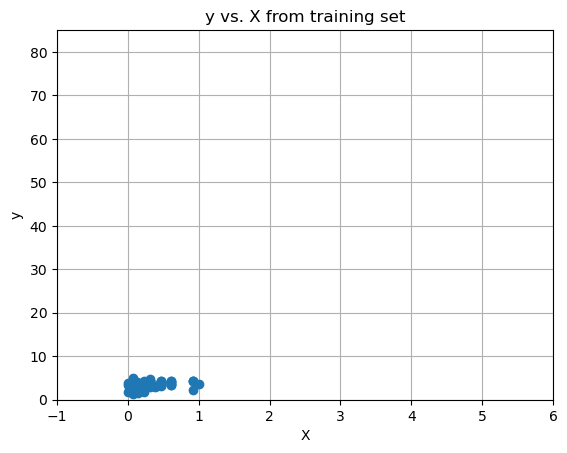

In [164]:
plt.xlim([-1, 6])
plt.ylim([0, 85])

# run this cell and observe the pattern of training data.
plt.plot(X_scaled[:,[7]],y,'o')
plt.title('y vs. X from training set')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.show(block=False)

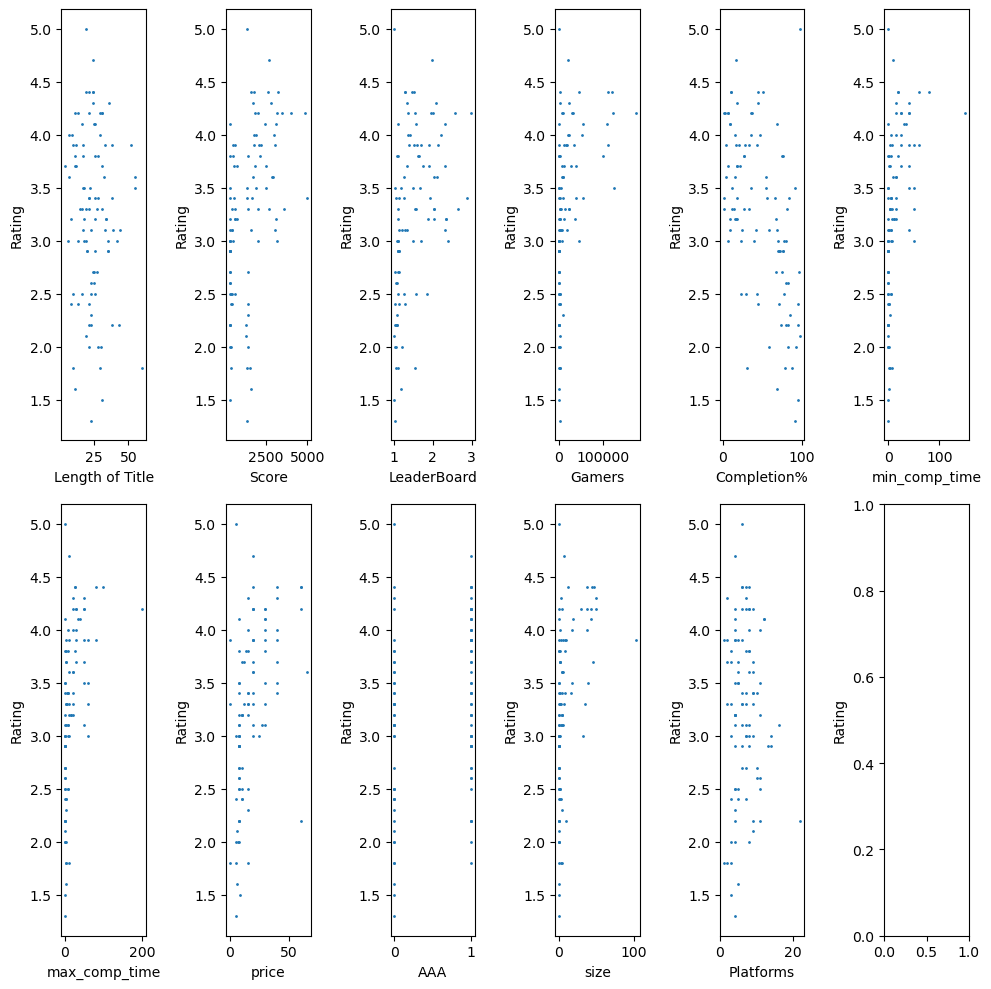

In [74]:
fig, axs = plt.subplots(2, 6, figsize=(10,10)) 

# top row
axs[0, 0].scatter(X[:,[0]],y, s=1)
axs[0, 0].set_xlabel("Length of Title")
axs[0, 1].scatter(X[:,[1]],y, s=1)
axs[0, 1].set_xlabel("Score")
axs[0, 2].scatter(X[:,[2]],y, s=1)
axs[0, 2].set_xlabel("LeaderBoard")
axs[0, 3].scatter(X[:,[3]],y, s=1)
axs[0, 3].set_xlabel("Gamers")
axs[0, 4].scatter(X[:,[4]],y, s=1)
axs[0, 4].set_xlabel("Completion%")
axs[0, 5].scatter(X[:,[5]],y, s=1)
axs[0, 5].set_xlabel("min_comp_time")

# bottom row
axs[1, 0].scatter(X[:,[6]],y, s=1)
axs[1, 0].set_xlabel("max_comp_time")
axs[1, 1].scatter(X[:,[7]],y, s=1)
axs[1, 1].set_xlabel("price")
axs[1, 2].scatter(X[:,[8]],y, s=1)
axs[1, 2].set_xlabel("AAA")
axs[1, 3].scatter(X[:,[9]],y, s=1)
axs[1, 3].set_xlabel("size")
axs[1, 4].scatter(X[:,[10]],y, s=1)
axs[1, 4].set_xlabel("Platforms")

for ax in axs.flat:
    ax.set( ylabel='Rating')
    
fig.tight_layout()

In [121]:
def poly_regression(X,y,lambda1): # We are using X for the design matrix.  It might be that X is in Z-space
    d = X.shape[1]
    N = X.shape[0]
    chunk1 = X.T.dot(X)
    chunk2 = N*lambda1*np.eye(X.shape[1])
    chunk3 = X.T.dot(y)
    w = np.linalg.inv(chunk1 + chunk2).dot(X.T).dot(y)

    return w.reshape((w.shape[0],1))


In [151]:
lambda1 =0  # We set lambda1 = 0 since we are not using any regularization in part 2.

# Record (store) the training error, validation error and w in train_costs(<list>), validation_costs(<list>) and w_dict(<dict>) for degrees = 1, 2, 3,..., 10 
validation_costs_6 = []  
train_costs_6 = []       
w_dict_6 = {}

model_degree = range(1,4) # The different feature transformatons we will perform

for d in model_degree:
    print('Order: ', d)
    poly = PolynomialFeatures(d)
    X_tr_poly = poly.fit_transform(X_scaled) # transforms the training data
    X_val_poly = poly.transform(X_val_scaled) # transforms the validation data
    
    
    # TODO Q06
    # Use your function from part 1 to determine w. The design matrix is X_tr_poly and the target vector is y_tr and lambda1=0. 
    w = poly_regression(X_tr_poly,y,lambda1)
    w_dict_6[d] = w  # save the value of w 
    print(w.shape)
    # predict yhat for the training data, compute E_in (MSE for the training data) and store E_in in train_costs
    yhat = X_tr_poly.dot(w)
    E_in = (1/X_tr_poly.shape[0])*(((yhat-y)**2).sum())
    train_costs_6.append(E_in)  

    # predict yhat_val for the validation data, compute E_val (MSE for the validation data) and store E_val in validation_costs
    yhat_val = X_val_poly.dot(w)
    print(yhat_val.shape)
    #dis = ((X_val_poly[:1]**2).sum())**.5
    E_val = (1/X_val_poly.shape[0])*(((yhat_val-y_val)**2).sum())
    validation_costs_6.append(E_val) 
    
#     print(yhat_val.shape)
#     print(y_val.shape)
    
    #print('w: ', w)
    print("X_tr_poly size:", X_tr_poly.shape)
    print("max:", np.max(X_tr_poly))
    print('E_in: ',E_in)
    print("E_val:", E_val)
    print('-------------------------')

Order:  1
(12, 1)
(20, 1)
X_tr_poly size: (100, 12)
max: 1.0
E_in:  92.12507802481993
E_val: 29.48550503631691
-------------------------
Order:  2
(78, 1)
(20, 1)
X_tr_poly size: (100, 78)
max: 1.0
E_in:  61550.18516591949
E_val: 31477.1628231793
-------------------------
Order:  3
(364, 1)
(20, 1)
X_tr_poly size: (100, 364)
max: 1.0
E_in:  9488318070.003002
E_val: 478015965199.6347
-------------------------


[29.48550503631691, 31477.1628231793, 478015965199.6347]


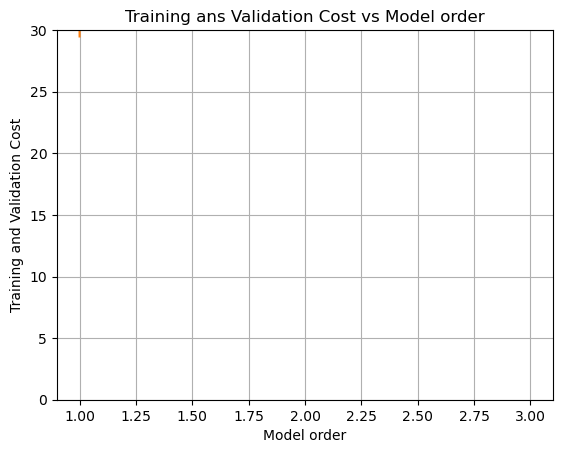

In [152]:
plt.ylim(0,30)
MO = np.arange(1,4)
print(validation_costs_6)
plt.plot(MO,train_costs_6, '.-')   # Training Cost vs Model Order.  Complete the code so it looks like plt.plot(model_degree, train_costs, '.-')
plt.plot(MO, validation_costs_6)   # Validation Cost vs Model Order.
plt.title('Training ans Validation Cost vs Model order')
plt.xlabel('Model order')
plt.ylabel('Training and Validation Cost')
plt.grid(True)
plt.show(block=False)

In [243]:
imin = np.argmin(validation_costs_6)
print("Estimated model order= {0:d}".format(imin+1))

y_predict_poly = predict(X_scaled,w_dict_6[1])

RSS = ((y_predict - y)**2).sum()
TSS = ((np.mean(y)- y)**2).sum()
R2 = 1- (RSS / TSS)
print("RSS = {0:f}".format(RSS))
print("TSS = {0:f}".format(TSS))
print("R^2 = {0:f}".format(R2))

Estimated model order= 1
RSS = 32.282295
TSS = 61.717900
R^2 = 0.476938


In [253]:
d=1
print('Order: ', d)
poly = PolynomialFeatures(d)
X_tr_poly = poly.fit_transform(X_scaled) # transforms the training data
X_val_poly =poly.fit_transform(X_val_scaled) # transforms the validation data

validation_costs_10 = []
train_costs_10 = []
w_dict_10 = {}

lambda_values = np.logspace(-10, 1,10) # After finding the best lambda value, we should go and try more lambda values near the best one we have tried.  However, our goal here to show how regularization works - so we will skip that step. 

for lambda1 in lambda_values:
    
    # TODO Q10
    # Use your function from part 1 to determine w.
    w = poly_regression(X_tr_poly,y,lambda1)
    print(lambda1)
    w_dict_10[lambda1] = w # save w for the current value of lambda1
    
    # predict yhat for the training data, compute E_in (MSE for the training data) and store E_in in train_costs
    yhat = X_tr_poly.dot(w)
    E_in = (1/X_tr_poly.shape[0])*(((yhat-y)**2).sum())
    train_costs_10.append(E_in)

    # predict yhat_val for the validation data, compute E_val (MSE for the validation data) and store E_val in validation_costs
    yhat_val = X_val_poly.dot(w)
    E_val = (1/X_val_poly.shape[0])*(((yhat_val-y_val)**2).sum())
    validation_costs_10.append(E_val)
    
    #print('w: ', w)
    print("Training size", X_tr_poly.shape)

    print('lambda:', np.around(lambda1,10))
    print('E_in: ',E_in)
    print("E_val:", E_val)
    print('-------------------------')

Order:  1
1e-10
Training size (100, 12)
lambda: 1e-10
E_in:  92.12507574358264
E_val: 29.485498495489082
-------------------------
1.6681005372000556e-09
Training size (100, 12)
lambda: 1.7e-09
E_in:  92.12503997534725
E_val: 29.48539593868844
-------------------------
2.782559402207126e-08
Training size (100, 12)
lambda: 2.78e-08
E_in:  92.12444441895013
E_val: 29.483687959576738
-------------------------
4.641588833612782e-07
Training size (100, 12)
lambda: 4.642e-07
E_in:  92.11480557536211
E_val: 29.455948685984023
-------------------------
7.742636826811277e-06
Training size (100, 12)
lambda: 7.7426e-06
E_in:  92.0088339844766
E_val: 29.13856731775058
-------------------------
0.00012915496650148855
Training size (100, 12)
lambda: 0.000129155
E_in:  91.71640269559113
E_val: 28.56760198342988
-------------------------
0.002154434690031887
Training size (100, 12)
lambda: 0.0021544347
E_in:  90.08523263718051
E_val: 28.938130030157726
-------------------------
0.0359381366380464
Trai

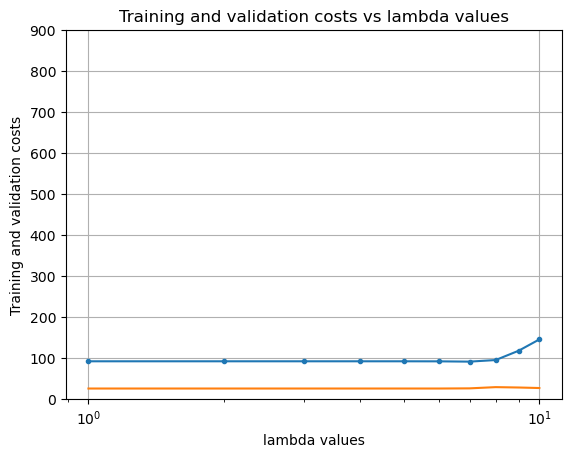

In [160]:
plt.ylim(0,900)
plt.xscale("log",base=10)

Ls = np.arange(1,11)
# Plot the learning curve
plt.plot(Ls,train_costs_10,'.-') #complete the code so it looks like plt.plot(lambda_values, train_costs,'.-')
plt.plot(Ls, validation_costs_10) # now plot the validation_costs instead of the train_costs

plt.title('Training and validation costs vs lambda values')
plt.ylabel('Training and validation costs')
plt.xlabel('lambda values')
plt.grid(True)
plt.show(block=False)

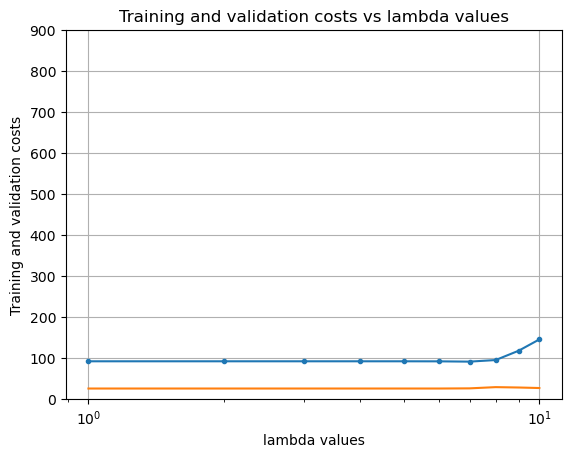

In [161]:
plt.ylim(0,900)
plt.xscale("log",base=10)

# TODO Q12
Ls = np.arange(1,11)
# Plot the learning curve
plt.plot(Ls,train_costs_10,'.-') #complete the code so it looks like plt.plot(lambda_values, train_costs,'.-')
plt.plot(Ls, validation_costs_10) # now plot the validation_costs instead of the train_costs

plt.title('Training and validation costs vs lambda values')
plt.ylabel('Training and validation costs')
plt.xlabel('lambda values')
plt.grid(True)
plt.show(block=False)

In [256]:
y_predict_reg = predict(X_scaled,w_dict_10[0.0359381366380464])

RSS = ((y_predict - y)**2).sum()
TSS = ((np.mean(y)- y)**2).sum()
R2 = 1- (RSS / TSS)
print("RSS = {0:f}".format(RSS))
print("TSS = {0:f}".format(TSS))
print("R^2 = {0:f}".format(R2))

RSS = 32.282295
TSS = 61.717900
R^2 = 0.476938
